In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.regularizers import l2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

# with open('encoded.pkl', 'rb') as file:
#     shotlog=pickle.load(file)
with open('multi-class.pkl','rb') as file:
    shotlog=pickle.load(file)

print(type(shotlog))
shotlog.info()

In [ ]:
fgmean=shotlog['EFG'].mean()
shotlog['EFG'].fillna(value=fgmean, inplace=True)
dfgmean=shotlog['DEFG'].mean()
shotlog['DEFG'].fillna(value=dfgmean,inplace=True)
shotlog=shotlog.drop(['CLOSEST_DEFENDER_PLAYER_ID','FINAL_MARGIN','W','LOCATION','CLOSEST_DEFENDER','Away Team','Home Team','Player_Team','player_name','Date','Matchup'],axis=1)

In [ ]:
shotlog.describe()

In [4]:
Scaler=StandardScaler()

X=shotlog.values[:,:-4]
y=shotlog[['Shot Quality_0','Shot Quality_1','Shot Quality_2']]
X_train, X_test, Y_train, Y_test=train_test_split(X,y, test_size=0.4, random_state=42)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
Y_train=Y_train.astype('float32')
Y_test=Y_test.astype('float32')

X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)

overlap = np.intersect1d(X_train, X_test)
print(len(overlap))  

X_base,X_final,Y_base,Y_final=train_test_split(X_train,Y_train, test_size=0.25, random_state=42)

0


In [5]:
input_shape=[X_train.shape[1]]
model=tf.keras.Sequential([
tf.keras.layers.Dense(units=32, activation='relu', input_shape=(14,)),
Dense(32, activation='relu',kernel_regularizer=l2(0.01)),
Dropout(0.3),
tf.keras.layers.Dense(units=16, activation='softmax'),
tf.keras.layers.Dense(units=3, activation='softmax')
])
model.summary()

/Users/michaelgriffin/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,115 (8.26 KB)

 Trainable params: 2,115 (8.26 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
validation=model.fit(X_train,Y_train, validation_data=(X_final, Y_final), batch_size=100, epochs=30)

<Axes: >

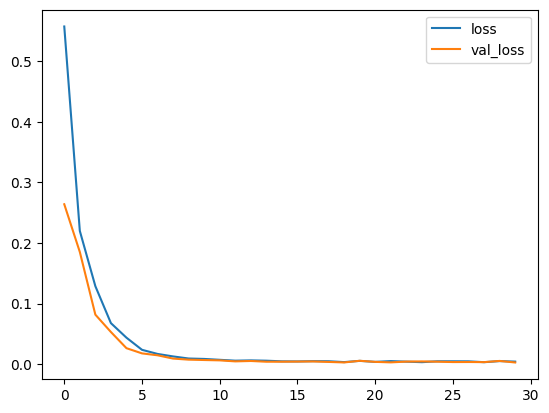

In [8]:
losses_df=pd.DataFrame(validation.history)

losses_df.loc[:,['loss','val_loss']].plot()

In [ ]:
trainer=model.fit(X_train, Y_train, validation_data=(X_base, Y_base), batch_size=100, epochs=30)

In [10]:
Y_train.value_counts()

Shot Quality_0  Shot Quality_1  Shot Quality_2
0.0             0.0             1.0               56172
1.0             0.0             0.0               18416
0.0             1.0             0.0                2253
Name: count, dtype: int64

<Axes: >

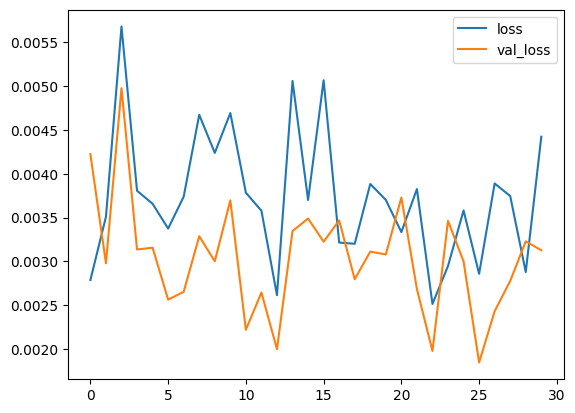

In [11]:
losses_df=pd.DataFrame(trainer.history)

losses_df.loc[:,['loss','val_loss']].plot()